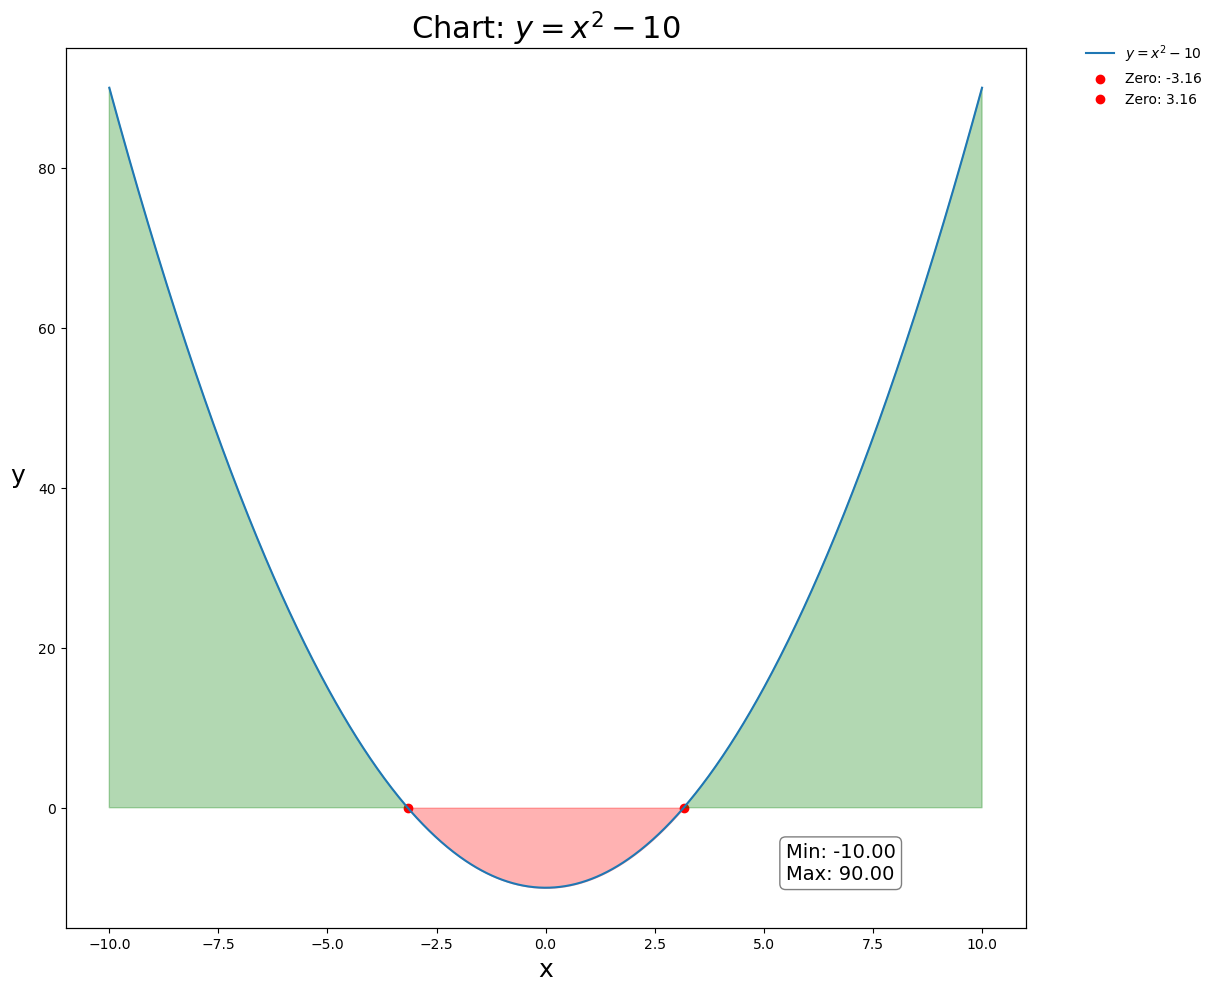

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, latex, lambdify, solve, core

def plot_function(function, x_range, num_points, show_roots = False, legend_position=(1.05, 1.02)):
    
#Adding X and Y variables
    x = symbols('x')
    y = eval(function)
    
#Calculation of zeroes
    if show_roots:
        roots = solve(Eq(y, 0), x)
        if roots[0].is_real:
            roots = [float(root) for root in roots]
            x_extr = sum(roots)/len(roots)
        else:
            x_extr = sum(roots)/len(roots)
            roots = []

#Addition of values for variables X and Y
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    y_values = lambdify(x, y, 'numpy')(x_values)

#Creating a graph for a given function
    fig, wykr = plt.subplots(figsize=(12, 8))
    wykr.plot(x_values, y_values, label=f'$y = {latex(y)}$')

#Adding zeroes to the graph
    if show_roots:
        for root in roots:
            wykr.scatter(root, 0, color='red', marker='o', label=f'Zero: {root:.2f}')

#Calculating min and max
    y_min, y_max = min(y_values), max(y_values)
    
#Highlighting the area between function chart and X axis
    wykr2 = wykr.twinx()
    wykr.fill_between(x_values, y_values, where=y_values >= 0, color='green', alpha=0.3)
    wykr.fill_between(x_values, y_values, where=y_values < 0, color='red', alpha=0.3)

#Adding labels to the chart
    wykr.set_xlabel('x', fontsize=18)
    wykr.set_ylabel('y', fontsize=18, rotation=0, labelpad=20) # Rotate y-label by 90 degrees
    wykr.set_title(f'Chart: $y = {latex(y)}$', fontsize=22)
    wykr.yaxis.tick_left()  
    wykr.yaxis.set_label_position("left")  
    wykr.yaxis.labelpad = 15  
    wykr2.get_yaxis().set_visible(False)

#Adding legend
    wykr.legend(loc='upper left', bbox_to_anchor=legend_position, frameon=False)

#Adding min max info frame
    textstr = f'Min: {y_min:.2f}\nMax: {y_max:.2f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    wykr.text(0.75, 0.05, textstr, transform=wykr.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)


    plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.1)
    plt.show()

# Example usage:
plot_function('x**2 - 10', (-10, 10), 1000, show_roots = True)